# Unsupervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("Wholesale_Data.csv")
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [24]:
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

<AxesSubplot:xlabel='Channel', ylabel='Milk'>

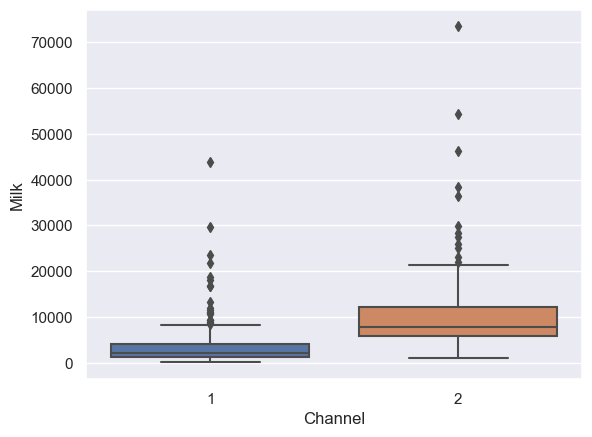

In [25]:
sns.boxplot(x = 'Channel', y = "Milk", data = df)

<AxesSubplot:xlabel='Channel', ylabel='Fresh'>

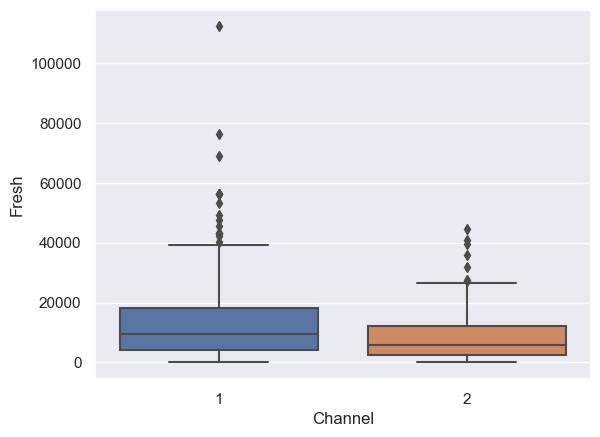

In [26]:
sns.boxplot(x = 'Channel', y = "Fresh", data = df)

<AxesSubplot:xlabel='Channel', ylabel='Grocery'>

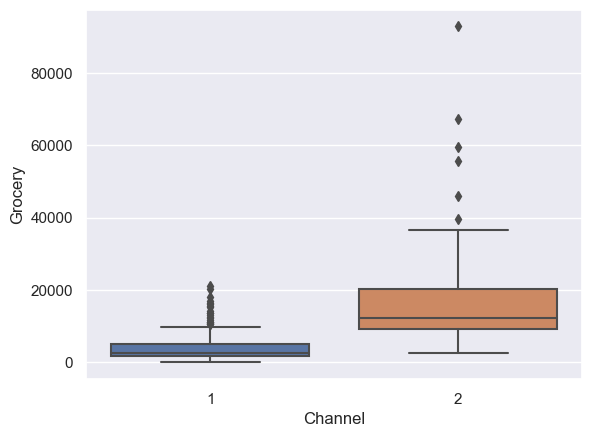

In [27]:
sns.boxplot(x = 'Channel', y = "Grocery", data = df)

In [29]:
df_features = df.drop(['Channel', 'Region'], axis = 1)
df_melted = pd.melt(df_features)

In [30]:
df_melted

,variable,value
0,Fresh,12669
1,Fresh,7057
2,Fresh,6353
3,Fresh,13265
4,Fresh,22615
...,...,...
2635,Delicassen,2204
2636,Delicassen,2346
2637,Delicassen,1867
2638,Delicassen,2125


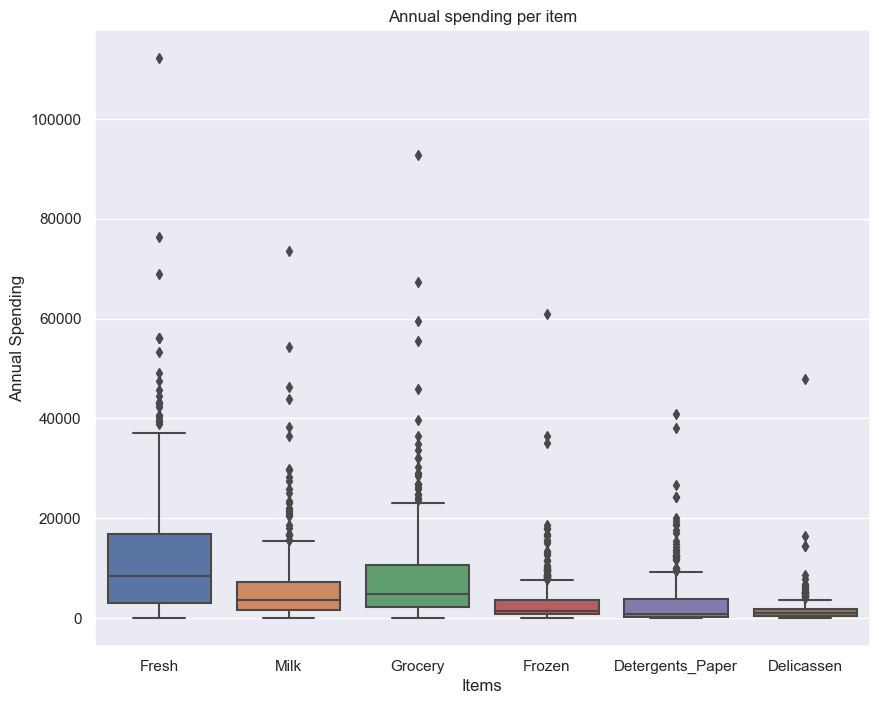

In [37]:
plt.figure(figsize=(10,8))
sns.boxplot(x='variable', y='value', data=df_melted).set(title='Annual spending per item')
    
#modify axis labels
plt.xlabel('Items')

plt.ylabel('Annual Spending')

plt.show()

array([[<AxesSubplot:title={'center':'Fresh'}>,
        <AxesSubplot:title={'center':'Milk'}>],
       [<AxesSubplot:title={'center':'Grocery'}>,
        <AxesSubplot:title={'center':'Frozen'}>],
       [<AxesSubplot:title={'center':'Detergents_Paper'}>,
        <AxesSubplot:title={'center':'Delicassen'}>]], dtype=object)

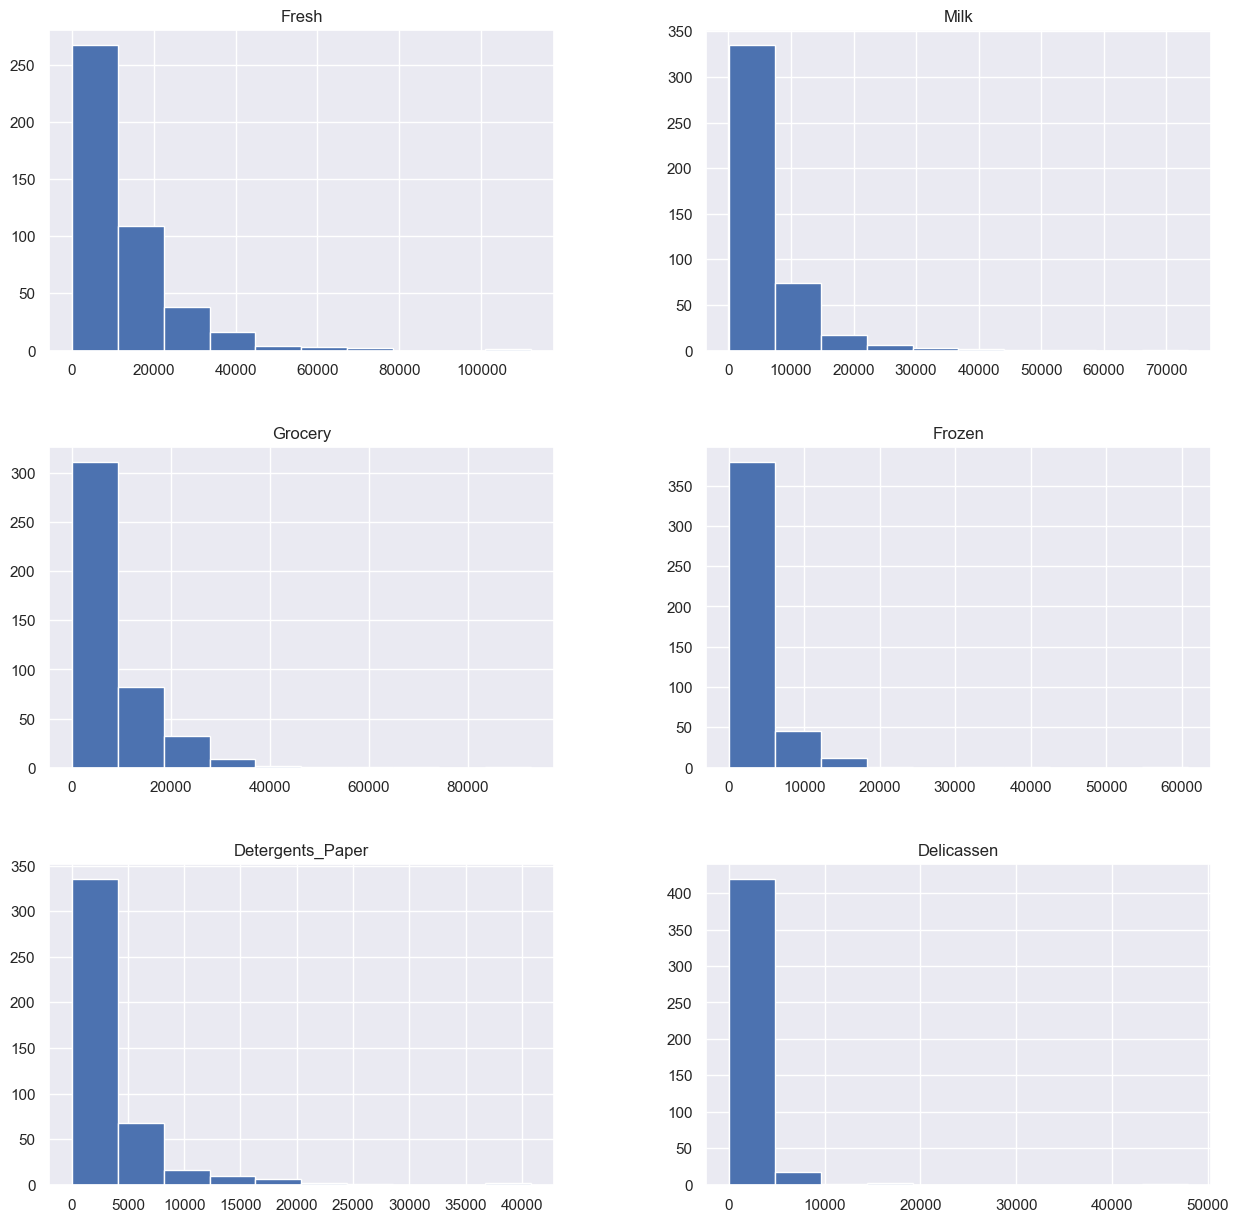

In [38]:
df_features.hist(figsize = (15,15))

## Correlation Matrix

In [39]:
df_features.corr()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Fresh,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


<AxesSubplot:>

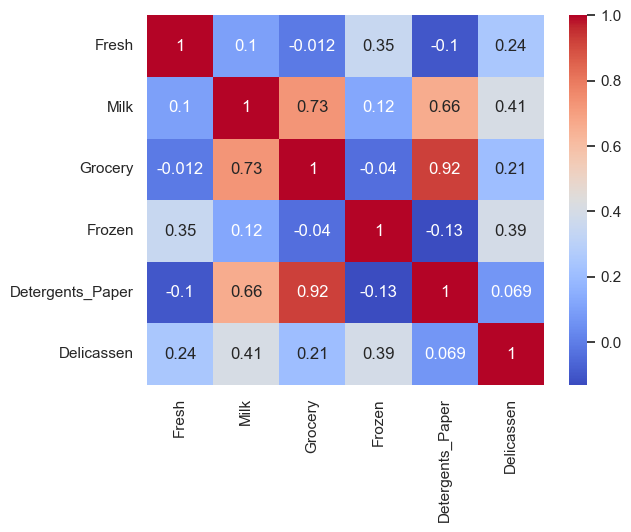

In [40]:
sns.heatmap(df_features.corr(), annot = True, cmap = "coolwarm")

## Outlier Detection

In [55]:
for column in y.columns:
    mean = df[column].mean()
    std = df[column].std()

    # Define the lower and upper outlier limits
    lower_outlier_limit = mean - 3 * std
    upper_outlier_limit = mean + 3 * std

    # Identify any data points that fall outside the lower and upper outlier limits
    outliers = df[df[column] < lower_outlier_limit] | df[df[column] > upper_outlier_limit]

    # Print the results
    print(f"Column: {column}")
    print(f"Mean: {mean}")
    print(f"Standard deviation: {std}")
    print(f"Lower outlier limit: {lower_outlier_limit}")
    print(f"Upper outlier limit: {upper_outlier_limit}")
   

Column: Fresh
Mean: 12000.297727272728
Standard deviation: 12647.328865076894
Lower outlier limit: -25941.68886795795
Upper outlier limit: 49942.28432250341
Column: Milk
Mean: 5796.265909090909
Standard deviation: 7380.377174570843
Lower outlier limit: -16344.865614621618
Upper outlier limit: 27937.39743280344
Column: Grocery
Mean: 7951.277272727273
Standard deviation: 9503.162828994346
Lower outlier limit: -20558.21121425576
Upper outlier limit: 36460.76575971031
Column: Frozen
Mean: 3071.931818181818
Standard deviation: 4854.673332592367
Lower outlier limit: -11492.088179595283
Upper outlier limit: 17635.95181595892
Column: Detergents_Paper
Mean: 2881.4931818181817
Standard deviation: 4767.8544479042
Lower outlier limit: -11422.07016189442
Upper outlier limit: 17185.056525530785
Column: Delicassen
Mean: 1524.8704545454545
Standard deviation: 2820.1059373693975
Lower outlier limit: -6935.447357562738
Upper outlier limit: 9985.188266653648


In [64]:
outliers.sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

## Standardizing the dataset

In [92]:
# Standardize the variables
data_standardized = (df - df.mean()) / df.std()

# Normalize the variables
data_normalized = (df- df.min()) / (df.max() - df.min())

# Print the standardized and normalized datasets
print(data_standardized)
print(data_normalized)

      Channel    Region     Fresh      Milk   Grocery    Frozen  \
0    1.447005  0.589997  0.052873  0.522972 -0.041068 -0.588697   
1    1.447005  0.589997 -0.390857  0.543839  0.170125 -0.269829   
2    1.447005  0.589997 -0.446521  0.408073 -0.028125 -0.137379   
3   -0.689512  0.589997  0.099998 -0.623310 -0.392530  0.686363   
4    1.447005  0.589997  0.839284 -0.052337 -0.079266  0.173661   
..        ...       ...       ...       ...       ...       ...   
435 -0.689512  0.589997  1.399719  0.847482  0.849793  2.072862   
436 -0.689512  0.589997  2.152842 -0.591469 -0.756304  0.296223   
437  1.447005  0.589997  0.200098  1.313176  2.345716 -0.542762   
438 -0.689512  0.589997 -0.135230 -0.516947 -0.601829 -0.418964   
439 -0.689512  0.589997 -0.728478 -0.555292 -0.572575 -0.619389   

     Detergents_Paper  Delicassen  
0           -0.043519   -0.066264  
1            0.086309    0.089050  
2            0.133080    2.240742  
3           -0.498021    0.093305  
4           -0.

In [93]:
# Alternatively

from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the StandardScaler object to the data
scaler.fit(df)

# Transform the data
data_standardized = scaler.transform(df)

# Print the standardized data
print(data_standardized)

[[ 1.44865163  0.59066829  0.05293319 ... -0.58936716 -0.04356873
  -0.06633906]
 [ 1.44865163  0.59066829 -0.39130197 ... -0.27013618  0.08640684
   0.08915105]
 [ 1.44865163  0.59066829 -0.44702926 ... -0.13753572  0.13323164
   2.24329255]
 ...
 [ 1.44865163  0.59066829  0.20032554 ... -0.54337975  2.51121768
   0.12145607]
 [-0.69029709  0.59066829 -0.13538389 ... -0.41944059 -0.56977032
   0.21304614]
 [-0.69029709  0.59066829 -0.72930698 ... -0.62009417 -0.50488752
  -0.52286938]]


## Feature Selection

In [181]:
from sklearn.decomposition import PCA

In [174]:
# Normalize the data

log_df = df_features.apply(lambda x: np.log(x))
log_df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504
3,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853
4,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525
...,...,...,...,...,...,...
435,10.299003,9.396903,9.682030,9.483036,5.204007,7.698029
436,10.577146,7.266129,6.638568,8.414052,4.532599,7.760467
437,9.584040,9.647821,10.317020,6.079933,9.605149,7.532088
438,9.238928,7.591357,7.710653,6.945051,5.123964,7.661527


In [175]:
# Create a PCA model
pca = PCA(n_components = 2)
log_df_pca = pca.fit(log_df)

In [176]:
# Get the explained variance ratio
feature_importance = pca.explained_variance_ratio_

In [177]:
feature_importance

array([0.44237417, 0.27657107])

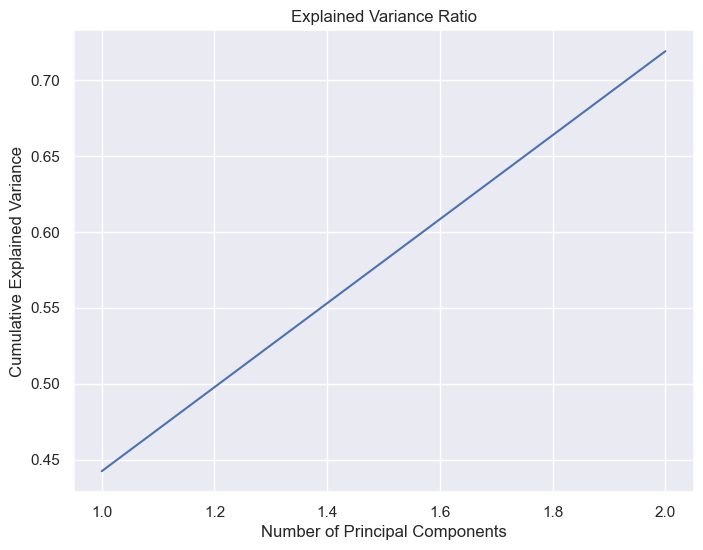

In [178]:
# Plot the explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(feature_importance) + 1), np.cumsum(feature_importance))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance Ratio')
plt.grid(True)
plt.show()

# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

In [101]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

C:\Users\talk2\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


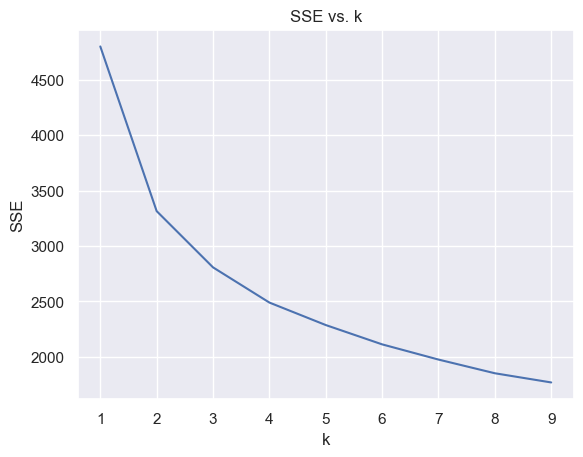

In [127]:
# Create a list of SSE values for different values of k
sse_values = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(log_df)
    sse_values.append(kmeans.inertia_)

# Plot the SSE values
plt.plot(range(1, 10), sse_values)
plt.title("SSE vs. k")
plt.xlabel("k")
plt.ylabel("SSE")
plt.show()



> ## The optimum number of cluster is 4

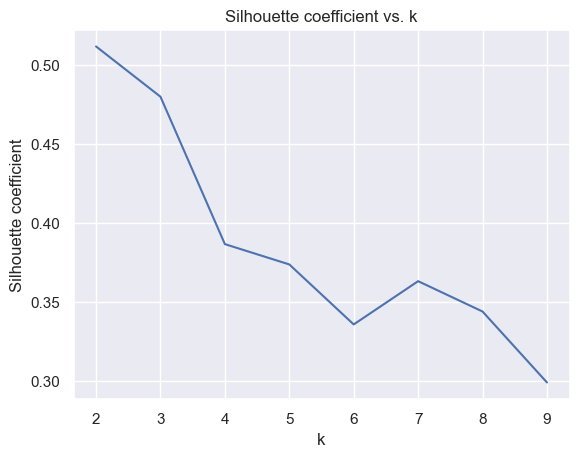

In [83]:
# Calculate the silhouette coefficient for different values of k
silhouette_coefficients = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df)
    silhouette_coefficients.append(silhouette_score(log_df, kmeans.labels_))

# Plot the silhouette coefficient values
plt.plot(range(2, 10), silhouette_coefficients)
plt.title("Silhouette coefficient vs. k")
plt.xlabel("k")
plt.ylabel("Silhouette coefficient")
plt.show()

# Based on the elbow method and the silhouette coefficient, the optimal number of clusters for the dataset is 5.

In [179]:
# Determine the optimal number of clusters
kmeans = KMeans(n_clusters=4, random_state = 42)
kmeans.fit(log_df)

# Assign data points to clusters
labels = kmeans.predict(log_df)

In [182]:
# Print the cluster labels
print(labels)

[0 0 0 3 3 0 0 0 0 0 0 2 0 0 0 2 1 3 0 0 0 2 3 0 0 1 2 2 0 3 0 3 2 3 2 1 3
 0 1 3 3 0 1 1 1 0 0 0 0 0 3 1 0 1 3 0 0 1 2 0 1 0 0 0 3 1 1 0 3 2 3 0 3 3
 0 2 3 0 2 1 2 1 0 3 0 0 0 3 2 3 2 3 0 3 1 1 1 2 2 2 0 0 0 3 3 2 1 0 1 1 2
 0 3 3 2 2 2 3 3 3 3 2 2 0 3 3 3 0 1 3 3 2 2 2 2 2 0 1 2 3 3 2 2 3 2 0 2 3
 2 2 2 2 2 2 2 0 0 3 0 1 0 2 3 0 0 0 0 1 2 2 1 1 1 1 2 1 3 2 2 3 0 0 1 3 1
 2 2 1 0 1 2 2 2 1 2 3 3 0 3 2 0 0 3 1 2 1 2 1 1 0 3 0 2 0 0 0 1 2 1 2 2 1
 2 3 2 3 0 2 1 3 3 1 2 1 3 1 2 2 2 3 3 3 3 0 0 0 2 2 2 3 2 0 3 3 3 2 2 3 3
 3 2 2 2 3 1 3 0 3 0 2 2 2 2 3 2 2 3 2 3 0 2 0 3 3 3 2 2 3 2 2 2 2 3 0 3 1
 3 0 0 2 0 0 1 1 1 1 0 3 2 1 3 3 1 2 3 0 2 1 2 0 2 3 3 3 3 3 2 2 3 3 3 0 3
 0 3 0 2 3 2 3 1 0 1 1 2 1 0 0 2 0 2 0 2 1 3 2 2 1 3 2 3 2 2 1 2 0 2 2 2 2
 3 3 3 0 2 2 0 2 2 1 3 3 3 2 3 2 2 2 2 2 2 2 2 3 2 2 0 2 2 2 2 3 2 2 3 2 3
 0 0 0 3 3 1 3 3 0 0 0 1 3 1 0 3 3 0 3 0 3 3 2 3 3 2 2 0 3 3 0 2 1]


In [183]:
# Print the centroids
print(kmeans.cluster_centers_)

[[9.01225772 9.06439685 9.49444721 7.19353783 8.58261467 7.37017275]
 [6.76413121 8.62031111 9.17879695 5.83736025 8.21830212 5.58785335]
 [8.719314   7.21971806 7.43718686 7.12825409 5.11114198 6.1186992 ]
 [9.56252259 8.03134702 8.24015862 8.39240858 6.30531672 7.24337787]]


### Visualizing all the cluster

In [184]:
def plot_clusters(data, kmeans, labels):
    for i in range(kmeans.n_clusters):
        cluster_data = data[labels == i]
        plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label="Cluster {}".format(i))
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker="*", c="red", label="Centroids")
    plt.legend()
    plt.show()

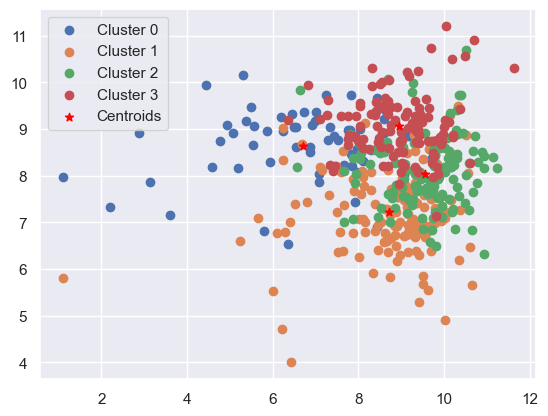

In [158]:
data = log_df.values
kmeans = KMeans(n_clusters=4)
kmeans.fit(data)
labels = kmeans.predict(data)
plot_clusters(data, kmeans, labels)

# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

In [169]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage

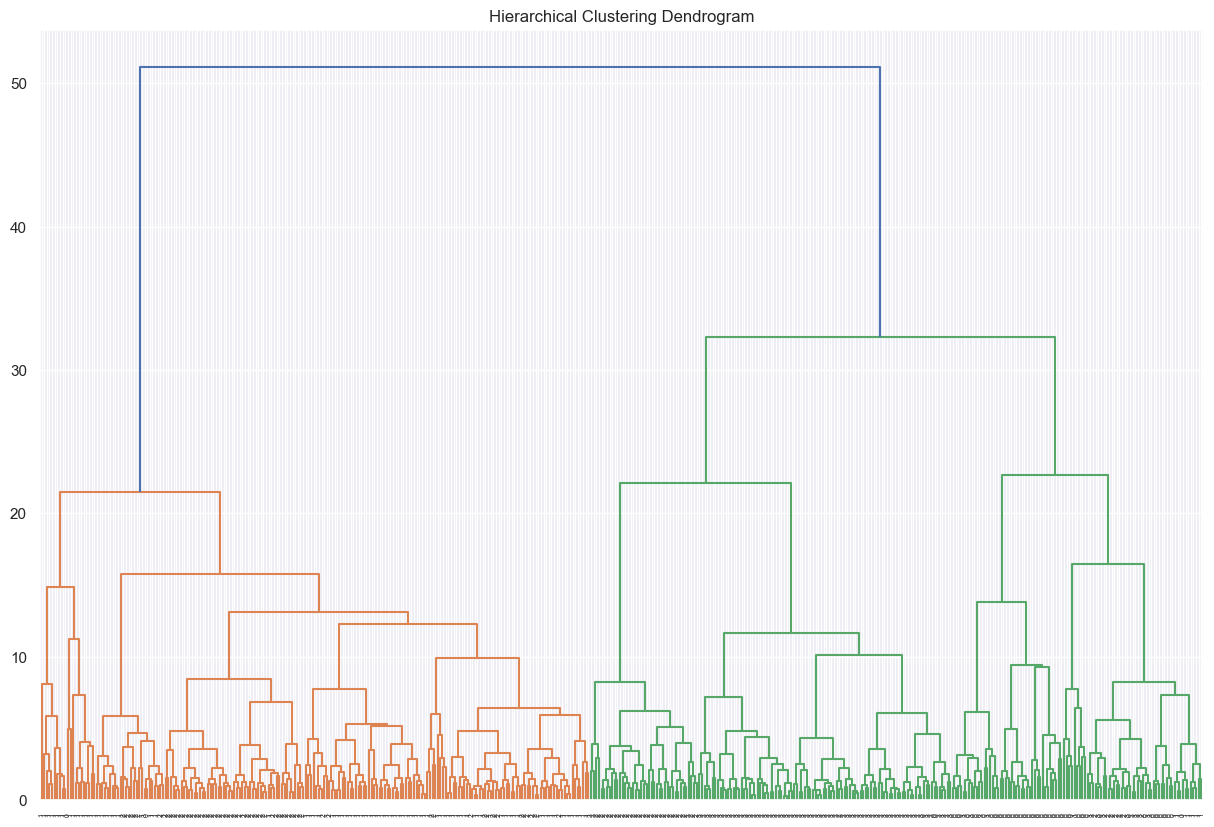

In [172]:
def plot_dendrogram(data, labels):
    Z = linkage(data, method="ward")
    plt.figure(figsize=(15, 10))
    dendrogram(Z, labels=labels, orientation="top")
    plt.title('Hierarchical Clustering Dendrogram')
    plt.show()

data = log_df.values
labels = kmeans.labels_
plot_dendrogram(data, labels)

# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

In [186]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca_results = pca.fit_transform(log_df)

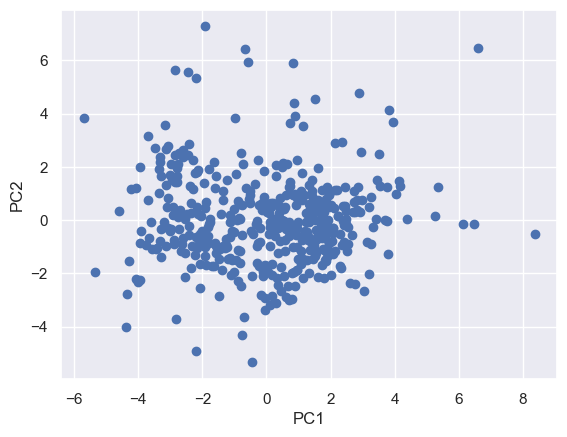

In [187]:
plt.scatter(pca_results[:, 0], pca_results[:, 1])

plt.xlabel('PC1')
plt.ylabel('PC2')

plt.show()


#### This plot shows the customers in two dimensions, with each dimension representing a principal component. The principal components are chosen so that they capture as much of the variation in the data as possible.

# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

#### From the analysis it shows The optimum number of cluster is 4 which means the items can be categorized to 4 distinvt groups
#### The grocery and Detergents_Paper are highly correlated which means a person who buys either of the items is likely to by the other
#### The Grocery and Milk are highly correlated
#### Also Detergents_Paper and Milk are closely correlated
#### Finally the Grocery and Frozen are the least correlated
